## Pregunta de investigación

¿Podemos, a partir de la composición química de una tinta, predecir la compatibilidad de dicha tinta sobre un material concreto?

## Carga de datos

In [22]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# Cargamos las tablas 

# Tabla que contiene los resultados de compatibilidad química entre las tintas de HP y varios materiales. Los valores oscilan entre 0 (nada compatible) y 1 (muy compatible).
testing_hp = pd.read_csv('./Testing_HP_dot.csv', sep = ';')

# Tabla que contiene la formulación de las tintas de HP
ink_formulation = pd.read_csv('./Ink_formulation_dot.csv', sep = ';')

In [3]:
print("Columns in testing_hp:", testing_hp.columns)
print("ink_formulation:", ink_formulation.columns)

Columns in testing_hp: Index(['Ink_ID', 'COMP_HDPE', 'COMP_PA', 'COMP_PVC', 'COMP_PE', 'COMP_POM',
       'COMP_SAN', 'COMP_PC', 'COMP_PET', 'COMP_PEI'],
      dtype='object')
ink_formulation: Index(['Ink_ID', 'Technology', 'Ink_type', 'Solvent A', 'Solvent B',
       'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive'],
      dtype='object')


In [4]:
testing_hp.head()

,Ink_ID,COMP_HDPE,COMP_PA,COMP_PVC,COMP_PE,COMP_POM,COMP_SAN,COMP_PC,COMP_PET,COMP_PEI
0,1,0.987995,0.877936,0.464226,NaN,0.061516,0.856189,0.880708,0.872157,NaN
1,2,0.928220,0.335293,0.772923,0.647043,0.243741,0.350888,0.281069,0.972229,0.942954
2,3,0.536732,NaN,0.657949,0.905591,0.964519,0.153753,0.868830,0.445847,0.559376
3,4,0.431773,0.152819,NaN,0.495876,NaN,0.721962,NaN,0.640412,0.461460
4,5,NaN,0.444026,0.024186,NaN,0.590682,0.326098,0.328672,0.821611,NaN


In [5]:
ink_formulation.head()

,Ink_ID,Technology,Ink_type,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,2D,DesignJet,0.7250,0.0500,0.0650,0.010,0.0750,0.000,0.0750
1,2,2D,DesignJet,0.4815,0.1845,0.0350,0.002,0.1485,0.000,0.1485
2,3,2D,DesignJet,0.5644,0.1000,0.1114,0.015,0.1025,0.000,0.1067
3,4,2D,Latex_G4,0.6250,0.1700,0.0620,0.020,0.0000,0.022,0.1010
4,5,2D,Latex_G3,0.5405,0.1400,0.0600,0.005,0.0750,0.000,0.1795


In [6]:
# Vamos a seleccionar un material de la tabla de "Testing_HP_dot", que se convertirá en nuestra variable objetivo,
# y la vamos a juntar con la tabla de "Ink_formulation_dot" para obtener una única tabla de trabajo. El material seleccionado es el HDPE.
COMP_HDPE = testing_hp[['Ink_ID', 'COMP_HDPE']] 
train_HDPE = pd.merge(COMP_HDPE, ink_formulation, on='Ink_ID')
train_HDPE.head()

,Ink_ID,COMP_HDPE,Technology,Ink_type,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,2D,DesignJet,0.7250,0.0500,0.0650,0.010,0.0750,0.000,0.0750
1,2,0.928220,2D,DesignJet,0.4815,0.1845,0.0350,0.002,0.1485,0.000,0.1485
2,3,0.536732,2D,DesignJet,0.5644,0.1000,0.1114,0.015,0.1025,0.000,0.1067
3,4,0.431773,2D,Latex_G4,0.6250,0.1700,0.0620,0.020,0.0000,0.022,0.1010
4,5,NaN,2D,Latex_G3,0.5405,0.1400,0.0600,0.005,0.0750,0.000,0.1795


## Exploración de datos

In [7]:
train_HDPE.columns

Index(['Ink_ID', 'COMP_HDPE', 'Technology', 'Ink_type', 'Solvent A',
       'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B',
       'Additive'],
      dtype='object')

In [8]:
train_HDPE.shape

(21, 11)

In [9]:
train_HDPE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ink_ID      21 non-null     int64  
 1   COMP_HDPE   17 non-null     float64
 2   Technology  21 non-null     object 
 3   Ink_type    21 non-null     object 
 4   Solvent A   21 non-null     float64
 5   Solvent B   21 non-null     float64
 6   Pigment A   21 non-null     float64
 7   Pigment B   21 non-null     float64
 8   Resin A     21 non-null     float64
 9   Resin B     21 non-null     float64
 10  Additive    21 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.9+ KB


In [10]:
train_HDPE.describe()

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
count,21.000000,17.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,0.533318,0.562629,0.159581,0.081867,0.013981,0.069543,0.004476,0.107924
std,6.204837,0.325803,0.097500,0.041508,0.050345,0.022833,0.040273,0.015128,0.047690
min,1.000000,0.015209,0.430600,0.050000,0.010000,0.000000,0.000000,0.000000,0.014300
25%,6.000000,0.291655,0.481500,0.140000,0.042900,0.000000,0.060600,0.000000,0.092000
50%,11.000000,0.488917,0.540500,0.170000,0.065000,0.010000,0.075000,0.000000,0.109300
75%,16.000000,0.845246,0.625000,0.184500,0.111100,0.017000,0.095200,0.000000,0.137000
max,21.000000,0.987995,0.765000,0.251400,0.181900,0.105600,0.148500,0.067000,0.179500


Nuestro dataset es ínfimo, por lo que vamos a usar técnicas de data augmentation para obtener nuevos valores a partir de los originales. Pero antes, hemos de eliminar algunas filas de nuestro DataSet. Aunque tengamos muy pocos datos, no podemos llenar los huecos de manera aproximada ya que se trata de la variable objetivo. Hemos de eliminar las filas que no tienen datos sobre compatibilidad química. Una vez creado el modelo, tal vez se puede usar para predecir valores de la variable COMP_HDPE y llenar esos huecos para crear un segundo modelo más preciso.

In [11]:
# Vamos ver como se distribuyen los datos que faltan
train_HDPE[train_HDPE['COMP_HDPE'].isna()]

,Ink_ID,COMP_HDPE,Technology,Ink_type,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
4,5,NaN,2D,Latex_G3,0.5405,0.1400,0.0600,0.0050,0.0750,0.000,0.1795
8,9,NaN,2D,Latex_G4,0.7650,0.1400,0.0100,0.0225,0.0000,0.005,0.0575
13,14,NaN,2D,Stitch,0.4306,0.2514,0.1033,0.1056,0.0052,0.000,0.1039
16,17,NaN,3D,Plastic_jet,0.5250,0.1500,0.0750,0.0000,0.0750,0.000,0.1750


## Procesamiento de datos

In [26]:
# Eliminamos las filas que no contienen datos sobre compatibilidad química del HDPE (COMP_HDPE).

Ink_IDs_to_delete = [5, 9, 14, 17]
train_HDPE_final = train_HDPE[~train_HDPE['Ink_ID'].isin(Ink_IDs_to_delete)]
train_HDPE_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 20
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ink_ID      17 non-null     int64  
 1   COMP_HDPE   17 non-null     float64
 2   Technology  17 non-null     object 
 3   Ink_type    17 non-null     object 
 4   Solvent A   17 non-null     float64
 5   Solvent B   17 non-null     float64
 6   Pigment A   17 non-null     float64
 7   Pigment B   17 non-null     float64
 8   Resin A     17 non-null     float64
 9   Resin B     17 non-null     float64
 10  Additive    17 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# A continuación eliminamos las columnas no numéricas que no aportan información útil a nuestro modelo

train_HDPE_final.drop(['Technology', 'Ink_type'], axis=1, inplace=True)

In [109]:
# Ya podemos ampliar nuestros datos. Lo haremos mediante noise injection.

def noise_injection(X, noise_level=0.1):
    new_ink_id = X['Ink_ID'].max() + 1 + np.arange(X.shape[0])
    X_new = pd.DataFrame({'Ink_ID': new_ink_id})
    
# Añadimos ruido a la variable COMP_HDPE, asegurándonos que los valores esten entre 0 y 1.
    noisy_comp_hdpe = X['COMP_HDPE'] + np.random.normal(0, noise_level, X.shape[0])
    noisy_comp_hdpe = np.where(np.isnan(noisy_comp_hdpe), X['COMP_HDPE'], noisy_comp_hdpe) 
    X_new['COMP_HDPE'] = np.clip(noisy_comp_hdpe, 0, 1)
    
# Añadimos ruido a las columnas que contienen la formulación de las tintas, teniendo en cuenta que no pueden tomar valores negativos y que la suma de todas estas celdas en una
# misma fila ha de ser igual a 1, ya que se son valores de concentración relativa.    
    concentration_cols = ['Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
    noisy_concentrations = X[concentration_cols].values + np.random.normal(0, noise_level, X[concentration_cols].shape)
    noisy_concentrations = np.clip(noisy_concentrations, 0, None)
    row_sums = noisy_concentrations.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    noisy_concentrations = noisy_concentrations / row_sums
    X_new[concentration_cols] = noisy_concentrations
    
    return X_new

# Finalmente aumentamos nuestro data set
train_HDPE_final_augmented = train_HDPE_final.copy()

while train_HDPE_final_augmented.shape[0] < 100:
    noisy_data = noise_injection(train_HDPE_final)
    train_HDPE_final_augmented = pd.concat((train_HDPE_final_augmented, noisy_data), axis=0, ignore_index=True)

print(train_HDPE_final_augmented.shape)

(102, 9)


In [113]:
train_HDPE_final_augmented.head(40)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,0.725000,0.050000,0.065000,0.010000,0.075000,0.000000,0.075000
1,2,0.928220,0.481500,0.184500,0.035000,0.002000,0.148500,0.000000,0.148500
2,3,0.536732,0.564400,0.100000,0.111400,0.015000,0.102500,0.000000,0.106700
3,4,0.431773,0.625000,0.170000,0.062000,0.020000,0.000000,0.022000,0.101000
4,6,0.127330,0.680200,0.195100,0.040200,0.017000,0.053200,0.000000,0.014300
5,7,0.888952,0.576200,0.141400,0.033300,0.030000,0.076200,0.000000,0.142900
6,8,0.845246,0.461000,0.181800,0.171800,0.013500,0.060700,0.000000,0.111200
7,10,0.015209,0.681500,0.185200,0.011100,0.010000,0.074100,0.000000,0.038100
8,11,0.897710,0.691200,0.171400,0.042900,0.015000,0.065200,0.000000,0.014300
9,12,0.455094,0.540500,0.140000,0.060000,0.018000,0.000000,0.067000,0.174500


Podemos observar que las nuevas filas tiene un Ink_ID que deja de seguir el orden númerico a partir del "Ink_ID" = 38. 

In [115]:
train_HDPE_final.head(40)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,0.7250,0.0500,0.0650,0.0100,0.0750,0.000,0.0750
1,2,0.928220,0.4815,0.1845,0.0350,0.0020,0.1485,0.000,0.1485
2,3,0.536732,0.5644,0.1000,0.1114,0.0150,0.1025,0.000,0.1067
3,4,0.431773,0.6250,0.1700,0.0620,0.0200,0.0000,0.022,0.1010
5,6,0.127330,0.6802,0.1951,0.0402,0.0170,0.0532,0.000,0.0143
6,7,0.888952,0.5762,0.1414,0.0333,0.0300,0.0762,0.000,0.1429
7,8,0.845246,0.4610,0.1818,0.1718,0.0135,0.0607,0.000,0.1112
9,10,0.015209,0.6815,0.1852,0.0111,0.0100,0.0741,0.000,0.0381
10,11,0.897710,0.6912,0.1714,0.0429,0.0150,0.0652,0.000,0.0143
11,12,0.455094,0.5405,0.1400,0.0600,0.0180,0.0000,0.067,0.1745


Sí comparamos el dataset original y el aumentado, podemos ver que las primeras filas del dataset aumentado son las mismas que el del original, por lo tanto podemos numerar las nuevas filas (o tintas) a partir de la última fila del dataset original (fila 20).

In [130]:
# Vamos a substituir todos los Ink_IDs generados en el data augmentation por unos nuevos, siguiendo un orden cardinal a partir del valor de la fila 20 (Ink_ID = 25)

start_row = 21
num_rows = len(train_HDPE_final_augmented) - start_row

last_value = train_HDPE_final_augmented.iloc[start_row - 1, train_HDPE_final_augmented.columns.get_loc('Ink_ID')]

new_values = np.arange(last_value + 1, last_value + 1 + num_rows)

train_HDPE_final_augmented.iloc[start_row:, train_HDPE_final_augmented.columns.get_loc('Ink_ID')] = new_values

Vamos a comprobar que los cambios se han realizado con éxito

In [131]:
train_HDPE_final_augmented.head(40)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,0.725000,0.050000,0.065000,0.010000,0.075000,0.000000,0.075000
1,2,0.928220,0.481500,0.184500,0.035000,0.002000,0.148500,0.000000,0.148500
2,3,0.536732,0.564400,0.100000,0.111400,0.015000,0.102500,0.000000,0.106700
3,4,0.431773,0.625000,0.170000,0.062000,0.020000,0.000000,0.022000,0.101000
4,6,0.127330,0.680200,0.195100,0.040200,0.017000,0.053200,0.000000,0.014300
5,7,0.888952,0.576200,0.141400,0.033300,0.030000,0.076200,0.000000,0.142900
6,8,0.845246,0.461000,0.181800,0.171800,0.013500,0.060700,0.000000,0.111200
7,10,0.015209,0.681500,0.185200,0.011100,0.010000,0.074100,0.000000,0.038100
8,11,0.897710,0.691200,0.171400,0.042900,0.015000,0.065200,0.000000,0.014300
9,12,0.455094,0.540500,0.140000,0.060000,0.018000,0.000000,0.067000,0.174500


In [132]:
train_HDPE_final_augmented.tail(10)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
92,97,0.100033,0.598470,0.349193,0.000000,0.000000,0.052188,0.000149,0.000000
93,98,0.936087,0.577648,0.228067,0.000000,0.136429,0.057855,0.000000,0.000000
94,99,0.530936,0.408071,0.169154,0.051928,0.000000,0.000000,0.236363,0.134483
95,100,0.297060,0.600509,0.000000,0.043758,0.002923,0.259923,0.000000,0.092886
96,101,0.251087,0.550385,0.108495,0.230736,0.000000,0.070024,0.000000,0.040360
97,102,0.374167,0.384481,0.283532,0.024699,0.168602,0.000000,0.044178,0.094508
98,103,0.157316,0.506678,0.079959,0.000000,0.027808,0.113177,0.043334,0.229045
99,104,0.640449,0.385022,0.244842,0.013839,0.000000,0.179476,0.015191,0.161631
100,105,0.576735,0.403161,0.148561,0.179450,0.000000,0.168819,0.000000,0.100010
101,106,0.827477,0.758878,0.054813,0.000000,0.000000,0.000000,0.025068,0.161241


Vemos que la operación se ha realizado con éxito. Ahora vamos a visualizar las diferencias entre el dataframe original y el aumentado.

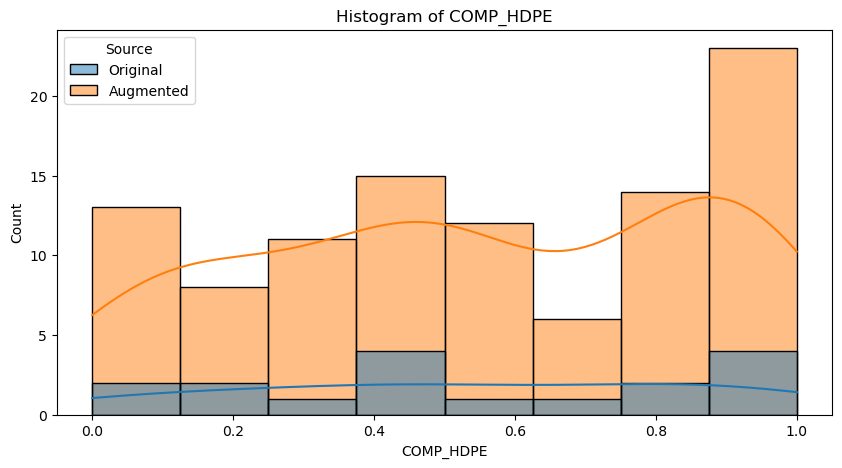

In [143]:
# En este caso vamos a usar un histograma para ver el cambio en la distribución de la variable objetivo "COMP_HDPE"

combined_HDPE = pd.concat([train_HDPE_final, train_HDPE_final_augmented], keys=['Original', 'Augmented']).reset_index(level=0).rename(columns={'level_0': 'Source'})
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_HDPE, x='COMP_HDPE', hue='Source', kde=True)
plt.title('Histogram of COMP_HDPE')
plt.show()

Vemos que la distribución de la variable "COMP_HDPE" es más heterogenia después del aumento de datos. Esto sería un inconveniente en otros casos, ya que se pierden parte de las características del dataframe original, pero en nuestro caso, este incremento en la variabilidad es bueno ya que nuestro dataframe original se ha creade de la nada con números aleatorios y uno de los riesgos que eso conlleva es un dataframe plano y sin patrones.

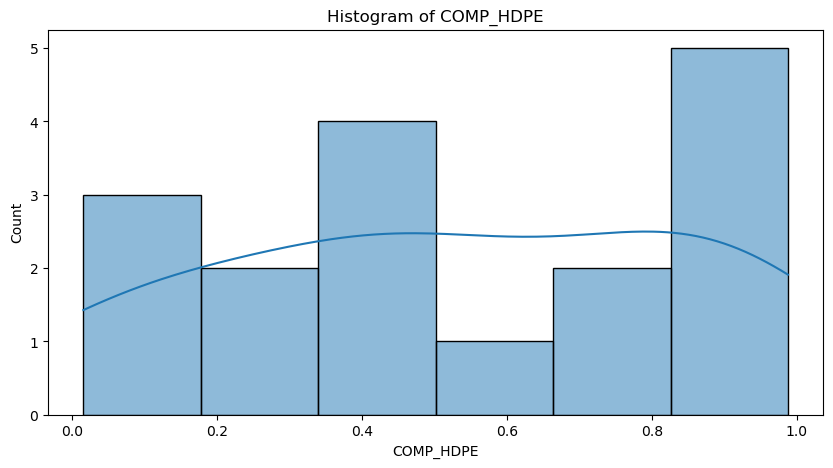

In [142]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_HDPE_final, x='COMP_HDPE', kde=True)
plt.title('Histogram of COMP_HDPE')
plt.show()

En este gráfico podemos ver la distribución del dataframe original con una escala más apropiada para la comparación. Aunque vemos que la distribución no es tan plana como en el gráfico anterior, sí que sigue siendo más homogenea que en el nuevo dataframe.

## Exploración de datos (post-augmentation)

In [133]:
train_HDPE_final_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ink_ID     102 non-null    int64  
 1   COMP_HDPE  102 non-null    float64
 2   Solvent A  102 non-null    float64
 3   Solvent B  102 non-null    float64
 4   Pigment A  102 non-null    float64
 5   Pigment B  102 non-null    float64
 6   Resin A    102 non-null    float64
 7   Resin B    102 non-null    float64
 8   Additive   102 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 7.3 KB


In [134]:
train_HDPE_final_augmented.describe()

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,55.156863,0.548421,0.511916,0.141843,0.086558,0.043869,0.083048,0.037128,0.095639
std,30.137883,0.317636,0.117585,0.086666,0.079143,0.058551,0.068981,0.051375,0.077232
min,1.000000,0.000000,0.256574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.250000,0.280869,0.421732,0.080418,0.011785,0.000000,0.022640,0.000000,0.025545
50%,55.500000,0.533834,0.508439,0.150980,0.068994,0.015000,0.075600,0.001528,0.099193
75%,80.750000,0.842944,0.579962,0.196987,0.141648,0.071597,0.122054,0.064985,0.139216
max,106.000000,1.000000,0.806892,0.349193,0.326989,0.258287,0.273204,0.236363,0.376291


In [49]:
augmented_HDPE.shape

(1537, 11)

In [52]:
train_HDPE_final.shape

(17, 11)

In [13]:
# Ya tenemos los datos para entrenar a nuestro modelo. Vamos a obviar las variables 'Technology' e 'Ink_type'
# porque no creemos que nos ayuden a precedir la compatibilidad del HDPE.

Y_train = train_HDPE_final['COMP_HDPE']

chosen_vars = ['Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
X_train = train_HDPE_final[chosen_vars]

In [14]:
X_train.head()

,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,0.7250,0.0500,0.0650,0.010,0.0750,0.000,0.0750
1,0.4815,0.1845,0.0350,0.002,0.1485,0.000,0.1485
2,0.5644,0.1000,0.1114,0.015,0.1025,0.000,0.1067
3,0.6250,0.1700,0.0620,0.020,0.0000,0.022,0.1010
5,0.6802,0.1951,0.0402,0.017,0.0532,0.000,0.0143


In [15]:
Y_train.head()

0    0.987995
1    0.928220
2    0.536732
3    0.431773
5    0.127330
Name: COMP_HDPE, dtype: float64

## Creación del modelo

En nuestro caso, vamos a usar el modelo de regresión lineal

In [16]:
from sklearn.linear_model import LinearRegression

log_reg = LinearRegression()
log_reg.fit(X_train, Y_train)

LinearRegression()

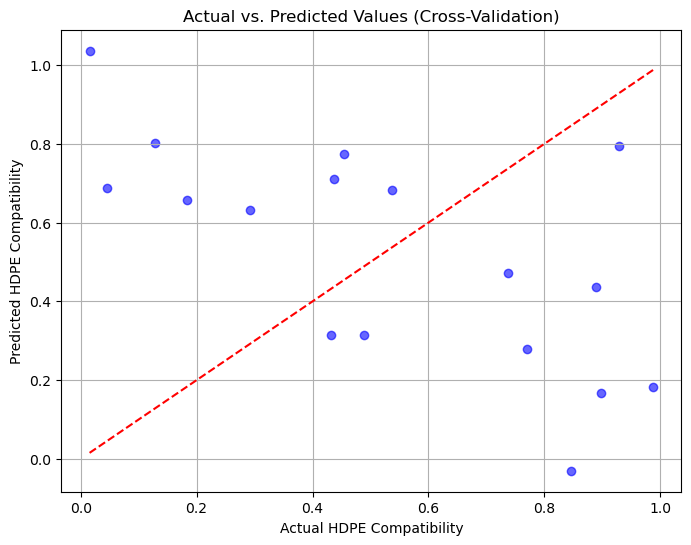

Mean Squared Error (MSE): 0.29307423005416744
R-squared (R2): -1.9335757340808089


In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = cross_val_predict(log_reg, X_train, Y_train, cv=5)

mse = mean_squared_error(Y_train, Y_pred)
r2 = r2_score(Y_train, Y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(Y_train, Y_pred, color='blue', alpha=0.6)
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], linestyle='--', color='red')
plt.xlabel('Actual HDPE Compatibility')
plt.ylabel('Predicted HDPE Compatibility')
plt.title('Actual vs. Predicted Values (Cross-Validation)')
plt.grid(True)
plt.show()
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')